# 1. Problem Statement:
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

Build a solution that should able to predict the sales of the
different stores of Big Mart according to the provided dataset.

# 2. Data Collection

Dataset Source - https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

We have train (8523) and test (5681) data set, train data set has both input and output
variable(s). We need to predict the sales for test data set.

## 2.1 Import Data and Required Packages

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
data= pd.read_csv('Train.csv')

In [4]:
# Top 5 records
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Shape of the dataset
data.shape

(8523, 12)

## 2.2 Dataset information
*   Item_Identifier: Unique product ID
*   Item_Weight: Weight of product
*   Item_Fat_Content: Whether the product is low fat or not
*   Item_Visibility: The % of total display area of all products in a store allocated to the particular product
*   Item_Type: The category to which the product belongs
*   Item_MRP: Maximum Retail Price (list price) of the product
*   Outlet_Identifier: Unique store ID
*   Outlet_Establishment_Year: The year in which store was established
*   Outlet_Size: The size of the store in terms of ground area covered
*  Outlet_Location_Type: The type of city in which the store is located
*  Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
*  Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.


# 3. Data checks to perform
*   Check Missing values
*   Check Duplicates
*   Check data type
*   Check the number of unique values of each column
*   Check statistics of data set
*   Check various categories present in the different categorical column



In [6]:
# Check Missing values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are null values in Item_Weight and Outlet_Size columns.

In [7]:
# Check Duplicates
data.duplicated().sum()

0

There are no duplicate values in the dataset

In [8]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Checking the number of unique values of each column
data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
# Check statistics of data set
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Exploring Data

In [11]:
# Value counts of all columns
for i in data.columns:
  print(data[i].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat             

Something is odd in Item_Fat_Content. Explore the Item_Fat_Content column seperately.

In [ ]:
# Value counts of Item_Fat_Content column
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Correct the spelling mistakes of the Low Fat and Regular categories

In [12]:
# Use Base Estimator and TransformerMixin for easy computation
from sklearn.base import BaseEstimator, TransformerMixin

class FatContent_func(BaseEstimator,TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    X['Item_Fat_Content'] = X['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
    return X

In [13]:
# Fit and transform the error values
itemFatContent_cleaner = FatContent_func()
data= itemFatContent_cleaner.fit_transform(data)
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# 4. Exploratory Data Analysis(EDA)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

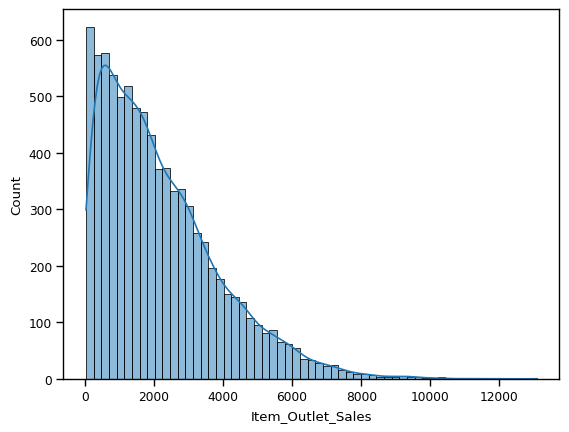

In [ ]:
# Check the distribution of Item_Outlet_Sales
sns.histplot(data['Item_Outlet_Sales'],kde= True)

Item_Outlet_Sales column values are not in normally distributed

In [ ]:
# Create a list of numerical columns
num_col=[]
for i in data.columns:
  if data[i].dtype!='object' and i!='Item_Outlet_Sales':
    num_col.append(i)

print(num_col)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


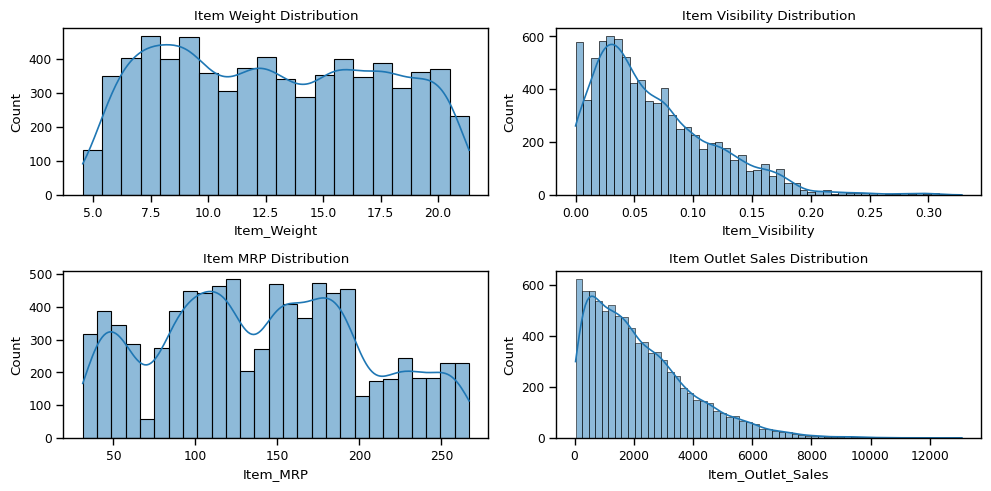

In [ ]:
# Distribution of numerical variables
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
sns.histplot(data['Item_Weight'], kde=True)
plt.title('Item Weight Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['Item_Visibility'], kde=True)
plt.title('Item Visibility Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['Item_MRP'], kde=True)
plt.title('Item MRP Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['Item_Outlet_Sales'], kde=True)
plt.title('Item Outlet Sales Distribution')

plt.tight_layout()
plt.show()

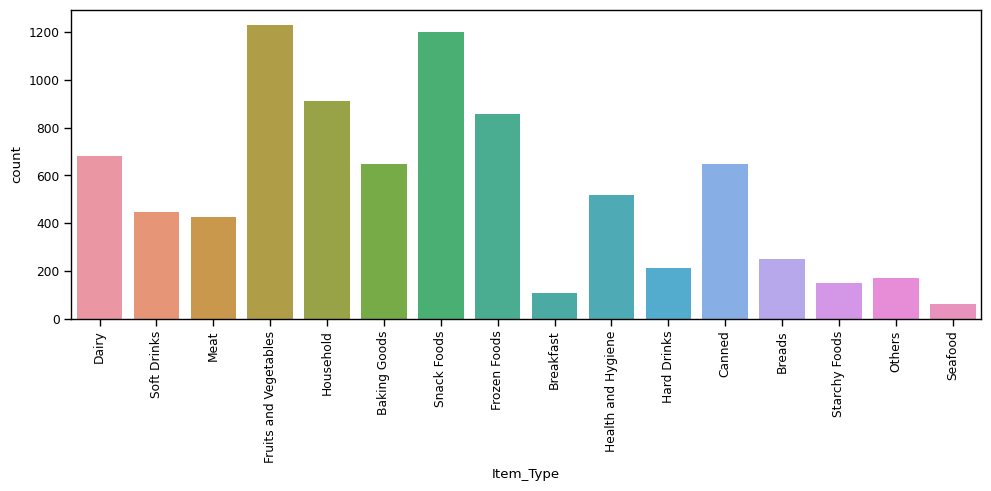

In [ ]:
# Count plot of Outlet_Size
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Type',data=data)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



*   Conts of items in Fruits, vegetables and snack foods categories items are high.
*   Count of Sea food category items are less.



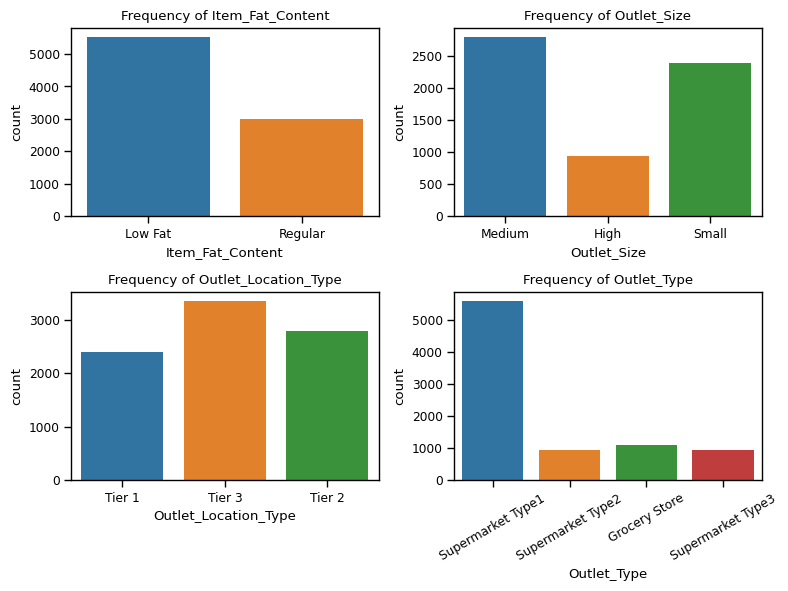

In [ ]:
# Count plot of Item_Fat_Content, Outlet_Size, Outlet_Location_Type, Outlet_Type
plt.figure(figsize=(8,6))

# Set the context to influence the bar width
sns.set_context("paper")

# Item Weight Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Item_Fat_Content', data=data)
plt.title('Frequency of Item_Fat_Content')

# Item Visibility Distribution
plt.subplot(2, 2, 2)
sns.countplot(x='Outlet_Size', data=data)
plt.title('Frequency of Outlet_Size')

# Item MRP Distribution
plt.subplot(2, 2, 3)
sns.countplot(x='Outlet_Location_Type', data=data)
plt.title('Frequency of Outlet_Location_Type')

# Item Outlet Sales Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Outlet_Type', data=data)
plt.title('Frequency of Outlet_Type')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



*   Count of low fat content items are high.
*   Count of Supermarket Type 1 are very high compared to other categoires in Outlet_Type.



<Axes: >

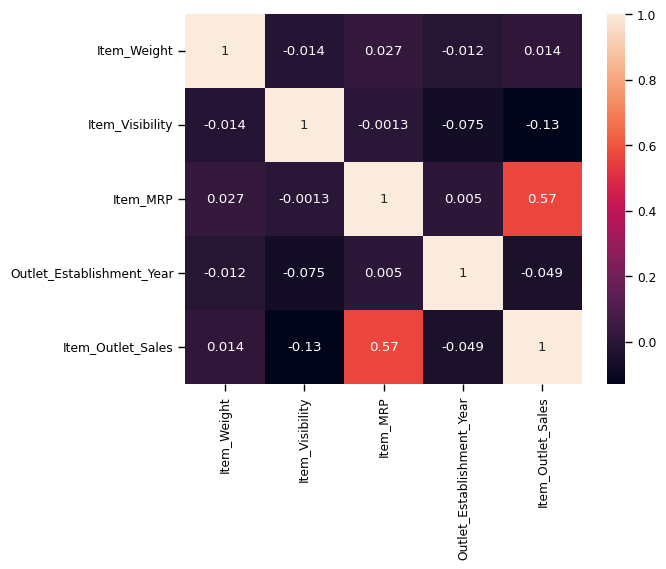

In [ ]:
# Heatmap of numerical columns
sns.heatmap(data.corr(),annot=True)

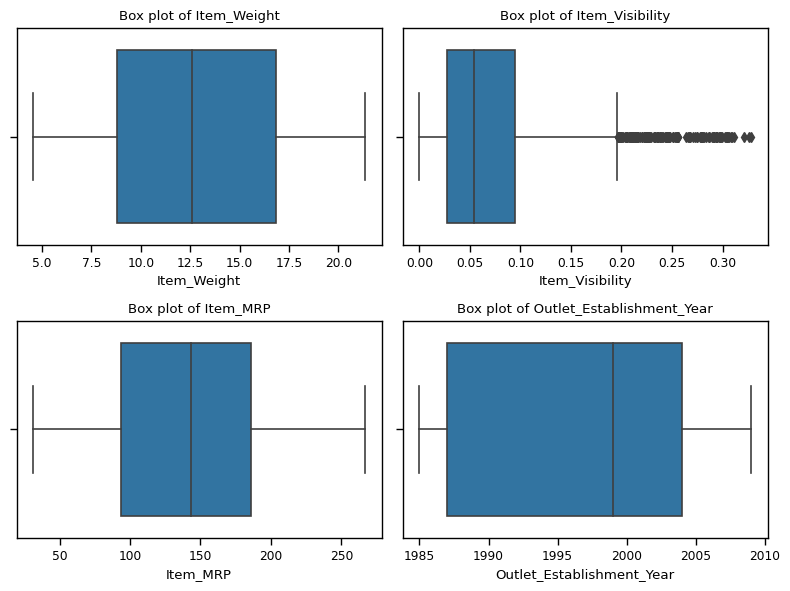

In [ ]:
plt.figure(figsize=(8, 6))

# Create box plots for each numerical column in num_col
for i, column in enumerate(num_col, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()